# ANDREJ PLAYLIST - VIDEO 1

In [5]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [7]:
def f(x):
  return 3*x**2 - 4*x + 5

In [8]:
def f_my_x(x):
    return 5+4*3*x**2+1

In [9]:
f(10)

265

In [10]:
f_my_x(3)

114

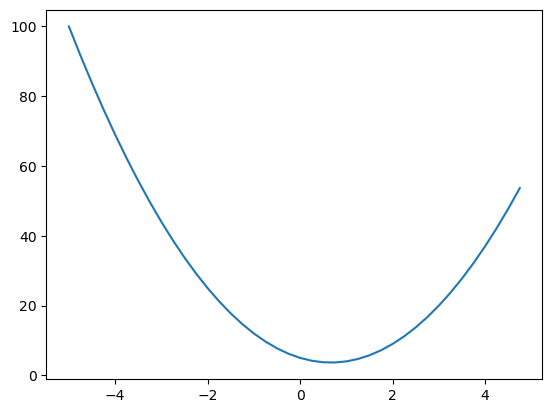

In [11]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [12]:
h=0.0001
x=3
print(f"Original = {f(x)}")
print(f"When added h = {f(x+h)}")

Original = 20
When added h = 20.001400030000006


Can observe it will go up

In [13]:
print(f"Difference is = {(f(x+h)-f(x))/h}")

Difference is = 14.000300000063248


In [14]:
# here at this point derivative is 0
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

In [15]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [16]:
#getting derivatives for multiple values : A
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c # this is the normal value
a += h #bumping up the value by h
d2 = a*b + c # new bumped up value
#---------------------------------

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [17]:
#getting derivatives for multiple values : B
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c # this is the normal value
b += h #bumping up the value by h
d2 = a*b + c # new bumped up value
#---------------------------------

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [18]:
#getting derivatives for multiple values : C
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c # this is the normal value
c += h #bumping up the value by h
d2 = a*b + c # new bumped up value
#---------------------------------

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [19]:
class Value:

    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a=Value(2.0)
b=Value(-3.0)
c=Value(10.0)
d=a*b+c

In [20]:
print(a)
print(b)
print(c)
print(d)

Value(data=2.0)
Value(data=-3.0)
Value(data=10.0)
Value(data=4.0)


In [21]:
a*b

Value(data=-6.0)

In [22]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [23]:
d._op

'+'

In [24]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d=a*b+c; d.label = 'd'

In [25]:
#copypaste from Andrej code for visualizing the expression:
# from graphviz import Digraph

# def trace(root):
#   # builds a set of all nodes and edges in a graph
#   nodes, edges = set(), set()
#   def build(v):
#     if v not in nodes:
#       nodes.add(v)
#       for child in v._prev:
#         edges.add((child, v))
#         build(child)
#   build(root)
#   return nodes, edges

# def draw_dot(root):
#   dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
#   nodes, edges = trace(root)
#   for n in nodes:
#     uid = str(id(n))
#     # for any value in the graph, create a rectangular ('record') node for it
#     dot.node(name = uid, label = "{ %s | data %.4f  }" % (n.label, n.data), shape='record')
#     if n._op:
#       # if this value is a result of some operation, create an op node for it
#       dot.node(name = uid + n._op, label = n._op)
#       # and connect this node to it
#       dot.edge(uid + n._op, uid)

#   for n1, n2 in edges:
#     # connect n1 to the op node of n2
#     dot.edge(str(id(n1)), str(id(n2)) + n2._op)

#   return dot



# GIVING SOME ERRORS SINCE THIS CODE WAS SOMETHING ELSE IN THE VIDEO

In [26]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [27]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

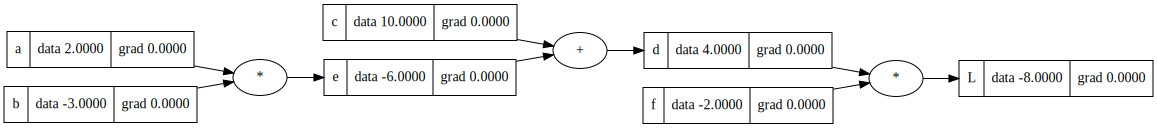

In [28]:
draw_dot(L)


In [29]:
#Not able to get what this is so moving further for now..

In [30]:
# def lol():
#     h = 0.001
  
#     a = Value(2.0, label='a')
#     b = Value(-3.0, label='b')
#     c = Value(10.0, label='c')
#     e = a*b; e.label = 'e'
#     d = e + c; d.label = 'd'
#     f = Value(-2.0, label='f')
#     L = d * f; L.label = 'L'
#     L1 = L.data
#     print(L1)

In [31]:
# lol()

In [32]:
#measuring effect of A



In [33]:
def lol():
    h = 0.001
  
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    print(L1)
    
#------------------------------------------------------------------
    a = Value(2.0+h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data
    print(L2)
    
    print((L2-L1)/h)
    
lol()

-8.0
-7.994
6.000000000000227


this is for when the value A is changed... so now when we check for L we will add h directly to which would obviously give us 1.

In [34]:
#manually setting grad of L here :
L.grad=1.0

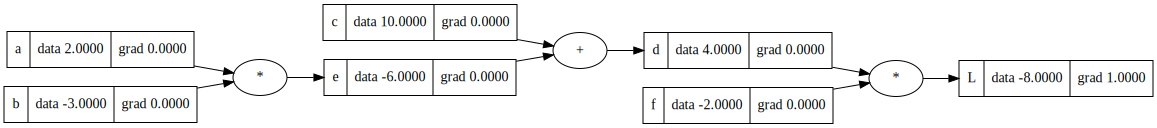

In [35]:
draw_dot(L)

In [36]:
#didnt really assing the grads here but i got the process.

In [38]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'


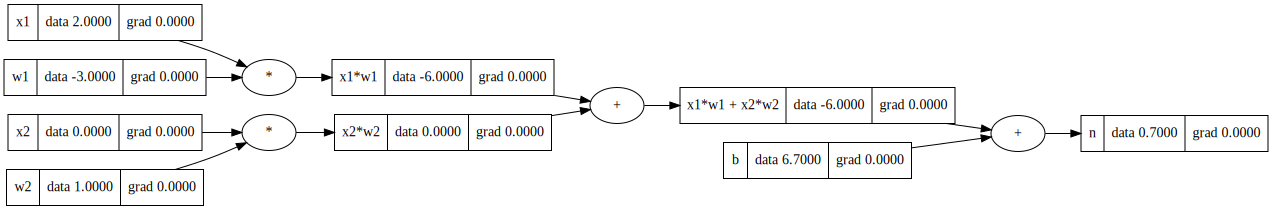

In [39]:
draw_dot(n)


The above daigram is the NN without the activation fucntion

In [44]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

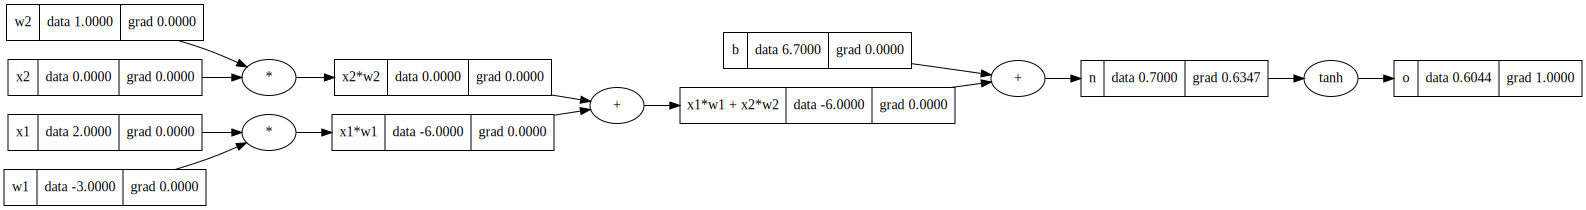

In [49]:
draw_dot(o)

in the video he explains the math and sets the gradients directly....with the same logic written above in this code...

so grad of o will be 1 
n will be...the formula used was 1-tanh**2 which was something 0.4..

So i wont go set all these manually for now.(moving further with the video)

So the things we did manually for operations like + * and tanh...we put backward functions for each operation which is done above in the class Value 

In [46]:
o.grad=1


In [48]:
o._backward()

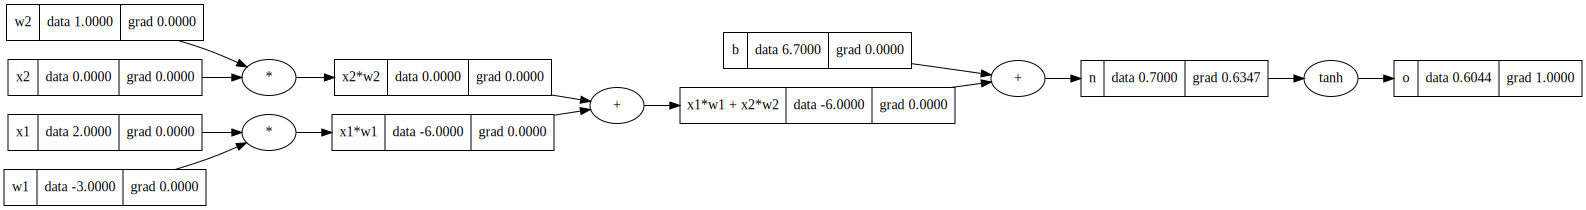

In [50]:
draw_dot(o)

In [51]:
n._backward()

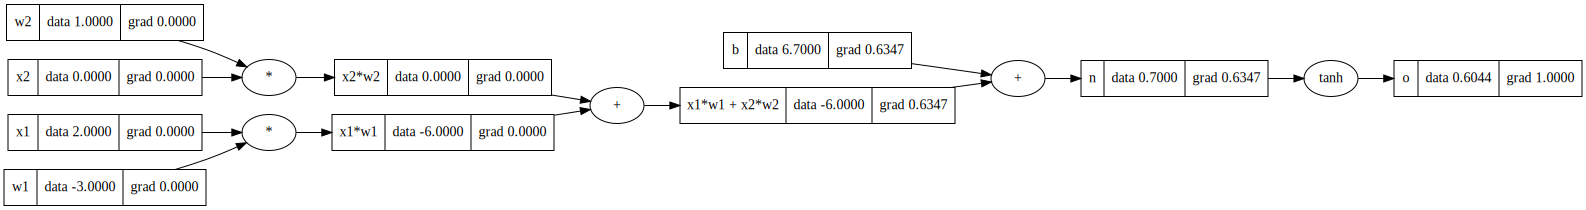

In [52]:
draw_dot(o)

In [53]:
x1w1x2w2._backward()

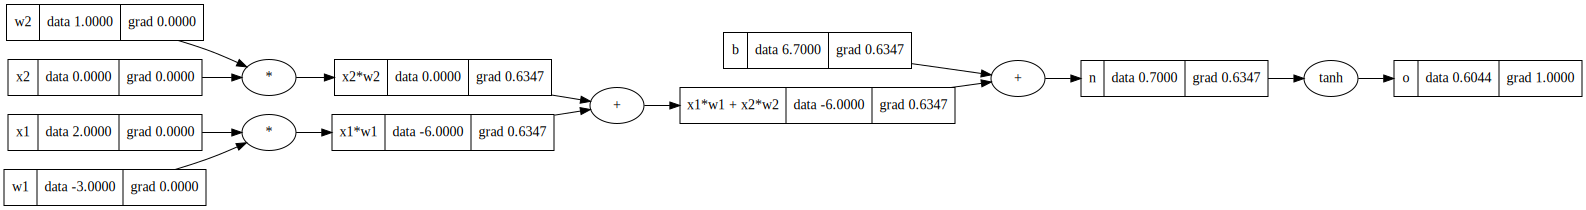

In [54]:
draw_dot(o)

In [55]:
x2w2._backward()

x1w1._backward()

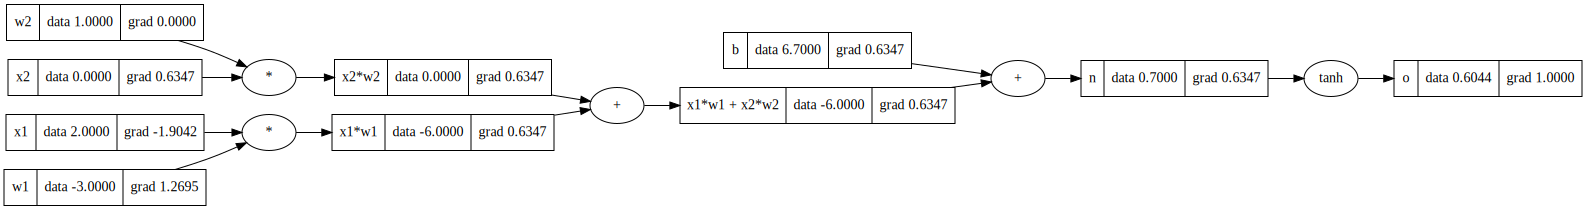

In [56]:
draw_dot(o)